# Hyperparameters Tuning

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 



## 1. Required Libraries & Functions

Before we start, we need to import few libraries and functions that we will use in this jupyterbook. You don't need to understand what those functions do for now.

In [4]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn import tree

## 2. Problem Representation

Let's recall Chapter 11 of [the Machine Learning Simplified book](https://themlsbook.com). We have a hypothetical dataset (Table 11.4) containing 14 days, with first 4 columns as features representing weather conditions and the last column as a target variable representing hours of golf that were played that day.

| Outlook | Humidity | Temperature | Wind | Golf Hours Played |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Sunny | Hot | High | Weak | 25 |
| Sunny | Hot | High | Strong | 30 |
| Overcast | Hot | High | Weak | 46 |
| Rain | Mild | High | Weak | 45 |
| Rain | Cold | Normal | Weak | 52 |
| Rain | Cold | Normal | Strong | 23 |
| Overcast | Cold | Normal | Strong | 43 |
| Sunny | Mild | High | Weak | 35 |
| Sunny | Cold | Normal | Weak | 38 |
| Rain | Mild | Normal | Weak | 46 |
| Sunny | Mild | Normal | Strong | 48 |
| Overcast | Mild | High | Strong | 52 |
| Overcast | Hot | Normal | Weak | 44 |
| Rain | Mild | High | Strong | 30 |







### 2.1. Create Hypothetical Dataset

Let's re-create the aforementioned table in python. We use `pandas` library - a library that manages **PAN**el **DA**ta **S**ets - to do so. Note that we have already imported it in the beginning of this notebook.

In [2]:
#re-create a hypothetical dataset
data = {'Outlook': ["Rain","Sunny","Rain","Rain","Sunny","Sunny","Rain","Overcast","Rain","Rain","Rain","Rain","Sunny","Rain"], 
        'Humidity': ["Mild","Mild","Cold","Mild","Hot","Hot","Hot","Cold","Mild","Hot","Cold","Mild","Cold","Hot"],
        'Temperature': ["High","High","High","High","Normal","High","Normal","Normal","High","Normal","Normal","Normal","Normal","High"],
        'Wind': ["Strong","Weak","Strong","Strong","Weak","Strong","Weak","Weak","Strong","Weak","Strong","Strong","Weak","Weak"],
        'Hours': [45,47,46,52,42,45,47,56,54,53,46,49,45,48]
       }  

#transform dataset into a DataFrame df using pandas library
df = pd.DataFrame(data)  
  
#print the output
df


,Outlook,Humidity,Temperature,Wind,Hours
0,Rain,Mild,High,Strong,45
1,Sunny,Mild,High,Weak,47
2,Rain,Cold,High,Strong,46
3,Rain,Mild,High,Strong,52
4,Sunny,Hot,Normal,Weak,42
5,Sunny,Hot,High,Strong,45
6,Rain,Hot,Normal,Weak,47
7,Overcast,Cold,Normal,Weak,56
8,Rain,Mild,High,Strong,54
9,Rain,Hot,Normal,Weak,53


### 2.2. Prepare the Dataset

To ensure that a decision tree can effectively interpret our data, it is necessary to encode our features.

In [37]:
# One-hot encoding in pandas can be done using get_dummies function
df_enc = pd.get_dummies(df)
df_enc

,Hours,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Humidity_Cold,Humidity_Hot,Humidity_Mild,Temperature_High,Temperature_Normal,Wind_Strong,Wind_Weak
0,45,0,1,0,0,0,1,1,0,1,0
1,47,0,0,1,0,0,1,1,0,0,1
2,46,0,1,0,1,0,0,1,0,1,0
3,52,0,1,0,0,0,1,1,0,1,0
4,42,0,0,1,0,1,0,0,1,0,1
5,45,0,0,1,0,1,0,1,0,1,0
6,47,0,1,0,0,1,0,0,1,0,1
7,56,1,0,0,1,0,0,0,1,0,1
8,54,0,1,0,0,0,1,1,0,1,0
9,53,0,1,0,0,1,0,0,1,0,1


Next step is to define our independent and dependent variables X and y.

In [8]:
# Define X and y variables
X = df_enc[["Outlook_Overcast", "Outlook_Rain", "Outlook_Sunny", "Humidity_Cold", "Humidity_Hot", "Humidity_Mild", "Temperature_High", "Temperature_Normal", "Wind_Strong"]]
y = df_enc.Hours.values

In [9]:
# Print x and y
print(f'{X=}')
print(f'{y=}')

X=    Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Humidity_Cold  \
0                  0             1              0              0   
1                  0             0              1              0   
2                  0             1              0              1   
3                  0             1              0              0   
4                  0             0              1              0   
5                  0             0              1              0   
6                  0             1              0              0   
7                  1             0              0              1   
8                  0             1              0              0   
9                  0             1              0              0   
10                 0             1              0              1   
11                 0             1              0              0   
12                 0             0              1              1   
13                 0             1            

## 3. Without setting any hyper-parameters

Let's assess the model score using default hyperparameter values, without making any adjustments.

In [40]:
clf = DecisionTreeRegressor() #initialize the model. Blank brackets means taking default hyper-parameter values
clf.fit(X, y) #fit the training data to the defined X and y
print(f'Accuracy of Decision Tree regression on training set: {clf.score(X, y):.2f}') #Print accuracy score

Accuracy of Decision Tree regression on training set: 0.71


The accuracy score of a Decision Tree regression is 0.71 or 71%. The next sections show how this score changes if you adjust model hyperparameters.

## 4. Tuning max_depth hyper-parameter

### 4.1. Controlling depth of a tree

Let's first understand how to control the depth of a decision tree model.

In [68]:
# Initialize the model
clf = DecisionTreeRegressor(max_depth=1) #setting the depth = 1
# Train the model
clf.fit(X, y)

DecisionTreeRegressor(max_depth=1)

You can visualize the trained decision tree using the following code:

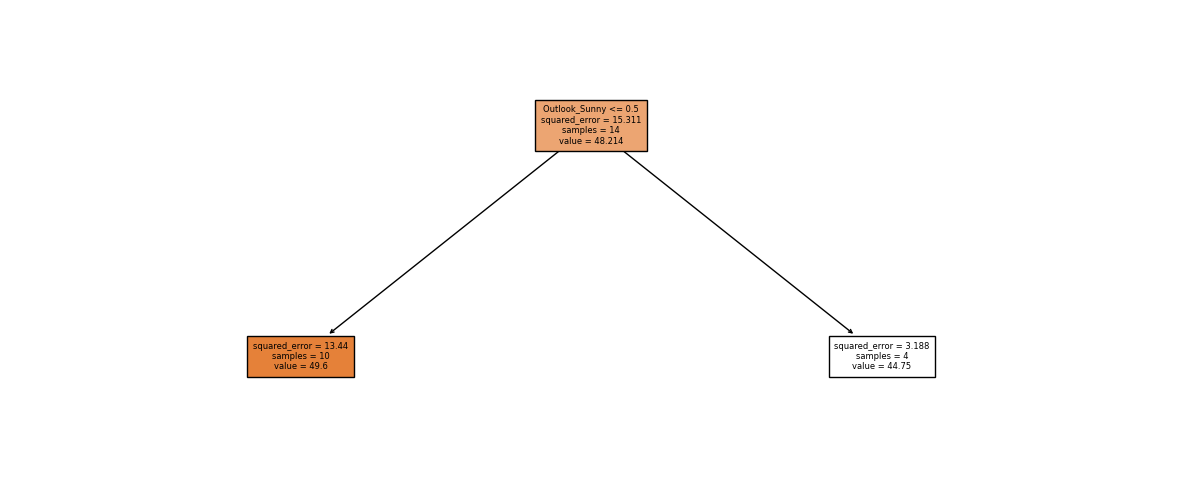

In [69]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

### 4.2. Building different size trees

Let's begin with adjusting the depth of a decision tree model, `max_depth` hyper-parameter.

#### 4.2.1. max_depth = 1

In [59]:
# Initialize the model
clf = DecisionTreeRegressor(max_depth=1)
# Train the model
clf.fit(X, y)
# Print the accuracy score of a model
print(f'Accuracy of Decision Tree Regression on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree Regression on training set: 0.31


You can visualize the trained decision tree using the following code:

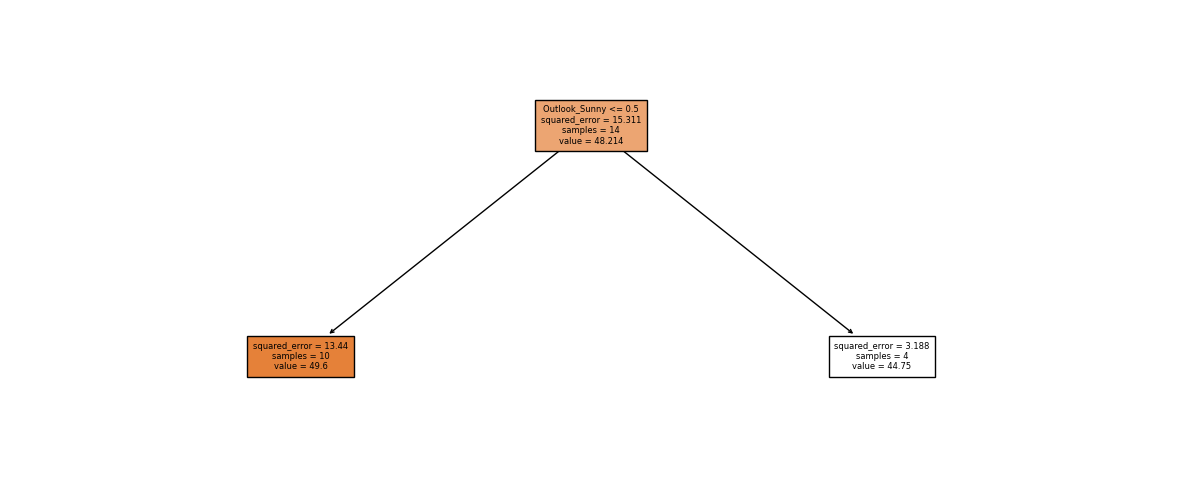

In [43]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

#### 4.2.2. max_depth = 2

In [61]:
# Initialize the model
clf = DecisionTreeRegressor(max_depth=2)
# Train the model
clf.fit(X, y)
# Print the accuracy score of a model
print(f'Accuracy of Decision Tree Regression on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree Regression on training set: 0.56


You can visualize the trained decision tree using the following code:

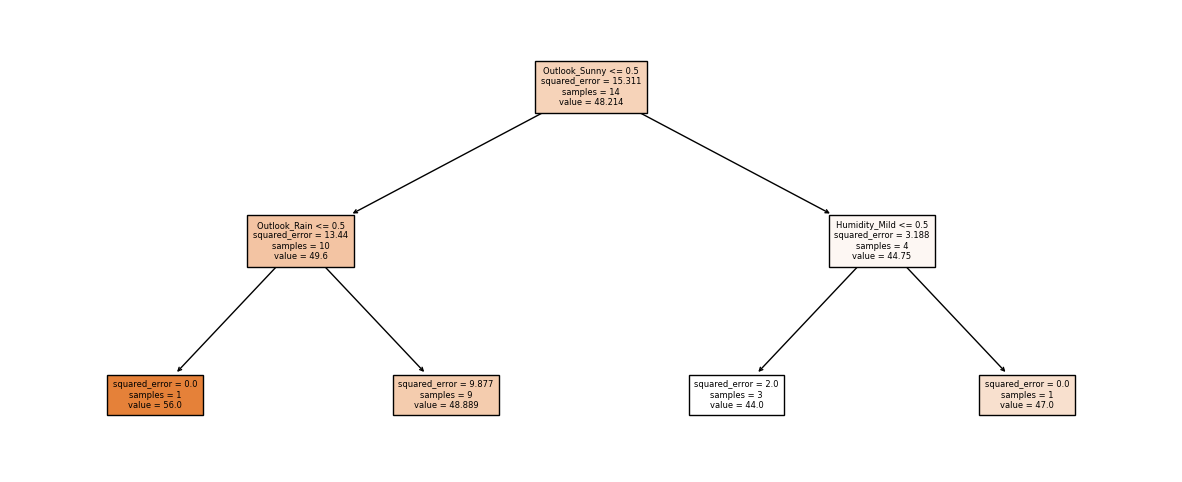

In [46]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

#### 4.2.3. max_depth = 3

In [63]:
# Initialize the model
clf = DecisionTreeRegressor(max_depth=3)
# Train the model
clf.fit(X, y)
# Print the accuracy score of a model
print(f'Accuracy of Decision Tree Regression on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree Regression on training set: 0.66


You can visualize the trained decision tree using the following code:

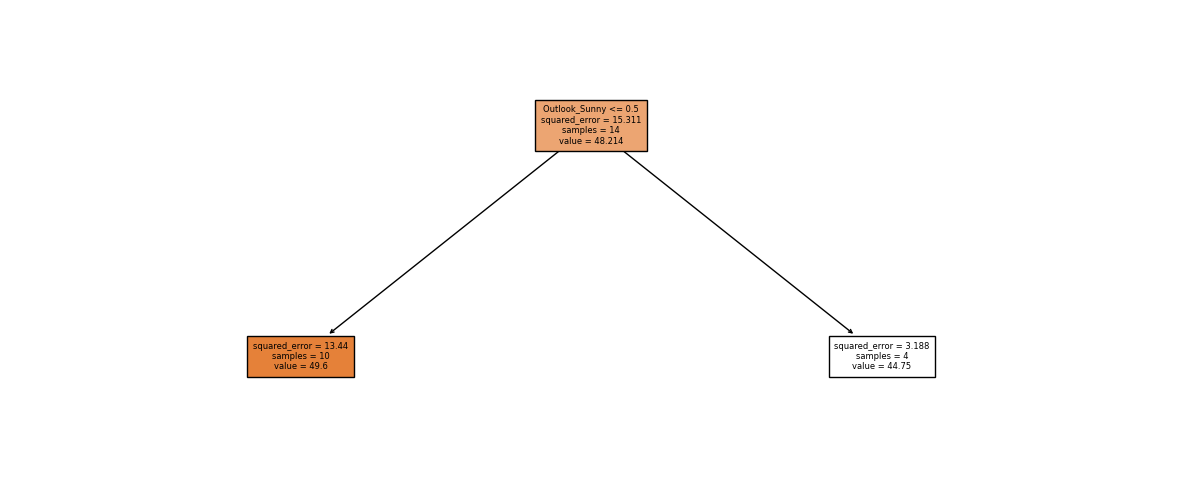

In [70]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf,
                          fontsize=6,
                          feature_names=X.columns,
                          filled=True)

#### 4.2.4. setting range for max_depth

Finally, you can set a range of values for a hyper-parameter `max_depth` using a simple for loop in Python.

In [65]:
for i in range(1,7):
    # Initialize the model
    clf = DecisionTreeRegressor(max_depth=i)
    # Train the model
    clf.fit(X, y)
    #score
    print(f'Depth = {i}, Score = {clf.score(X, y)}')

Depth = 1, Score = 0.3135288237254249
Depth = 2, Score = 0.557332740938206
Depth = 3, Score = 0.6644451849383539
Depth = 4, Score = 0.6889925580362102
Depth = 5, Score = 0.7076530045540376
Depth = 6, Score = 0.7076530045540376


## 5. Tuning max_features hyper-parameter

In decision tree algorithms, the max_features hyperparameter controls the maximum number of features that are considered during the process of finding the best split for a node in the tree. 

When a decision tree constructs its branches, it evaluates different features and their potential splits to determine the most effective way to partition the data. The max_features hyperparameter comes into play by limiting the number of features that the algorithm considers at each node. By restricting the number of features, the decision tree becomes less prone to capturing noise or idiosyncrasies in the training data and instead focuses on more meaningful patterns.

To explore the impact of different values for the hyperparameter `max_features`, we can utilize the same for loop we wrote above. This will allow us to evaluate the model's performance under various settings of this particular hyperparameter.

In [73]:
for i in range(1,4):
    # Initialize the model
    clf = DecisionTreeRegressor(max_features=i)
    # Train the model
    clf.fit(X, y)
    #score
    print(clf.score(X, y))

0.7076530045540376
0.7076530045540376
0.7076530045540376


## 6. Tuning min_samples_split hyper-parameter

In decision tree algorithms, the min_samples_split hyperparameter controls the minimum number of samples required to split a node into child nodes during the construction of the tree. This hyperparameter helps prevent the tree from growing too deep and overfitting the training data by ensuring that a node is only split if it contains a sufficient number of samples.

When constructing a decision tree, the algorithm evaluates different features and potential splits to determine the best way to partition the data. The min_samples_split hyperparameter comes into play by setting a threshold for the number of samples that a node must have in order to be considered for splitting. If the number of samples in a node falls below this threshold, the node is not further split, and the algorithm stops growing the tree at that branch.

To explore the impact of different values for the hyperparameter `min_samples_split`, we can utilize the same for loop we wrote above. This will allow us to evaluate the model's performance under various settings of this particular hyperparameter.

In [81]:
for i in range(1,16):
    # Initialize the model
    clf = DecisionTreeRegressor(min_samples_split=i)
    # Train the model
    clf.fit(X, y)
    #score
    print(f'min_samples_split = {i}, Score = {clf.score(X, y)}')

min_samples_split = 1, Score = 0.7076530045540376
min_samples_split = 2, Score = 0.7076530045540376
min_samples_split = 3, Score = 0.6866600022214817
min_samples_split = 4, Score = 0.667222037098745
min_samples_split = 5, Score = 0.6295123847606354
min_samples_split = 6, Score = 0.6295123847606354
min_samples_split = 7, Score = 0.6295123847606354
min_samples_split = 8, Score = 0.625958013995335
min_samples_split = 9, Score = 0.625958013995335
min_samples_split = 10, Score = 0.5258432374393722
min_samples_split = 11, Score = 0.3135288237254249
min_samples_split = 12, Score = 0.3135288237254249
min_samples_split = 13, Score = 0.3135288237254249
min_samples_split = 14, Score = 0.3135288237254249
min_samples_split = 15, Score = 0.0


The decrease in the model score as the values for the hyperparameter min_samples_split increases is a normal behavior due to the principle of bias-variance trade-off. This trade-off governs the relationship between model complexity and its ability to generalize to new, unseen data.

As min_samples_split increases, it enforces a constraint on the minimum number of samples required to split a node in the decision tree. Consequently, the tree becomes shallower and less complex. This reduction in complexity limits the tree's capacity to capture fine-grained patterns and noise in the training data.

## 7.  Tuning min_samples_leaf hyper-parameter

In decision tree algorithms, the `min_samples_leaf` hyperparameter determines the minimum number of samples required for a node to be considered a leaf node, effectively controlling the size of terminal nodes in the tree. Leaf nodes are the endpoints of the tree branches where decisions or predictions are made.

To explore the impact of different values for the hyperparameter `min_samples_leaf`, we can utilize the same for loop we wrote above. This will allow us to evaluate the model's performance under various settings of this particular hyperparameter.

In [82]:
for i in range(1,9):
    # Initialize the model
    clf = DecisionTreeRegressor(min_samples_leaf=i)
    # Train the model
    clf.fit(X, y)
    #score
    print(f'min_samples_leaf = {i}, Score = {clf.score(X, y)}')

min_samples_leaf = 1, Score = 0.7076530045540376
min_samples_leaf = 2, Score = 0.5031656114628458
min_samples_leaf = 3, Score = 0.37448628235032777
min_samples_leaf = 4, Score = 0.37448628235032777
min_samples_leaf = 5, Score = 0.05350068495686611
min_samples_leaf = 6, Score = 0.00033322225924714566
min_samples_leaf = 7, Score = 0.00033322225924714566
min_samples_leaf = 8, Score = 0.0


## 8.  Tuning split criteria hyper-parameter

In [83]:
depths = [1, 2, 3]
criterions = ['absolute_error', 'squared_error', 'friedman_mse', 'poisson']

depth_results = []
criterion_results = []
score_results = []

for depth in depths:
    for criterion in criterions:
        clf = DecisionTreeRegressor(max_depth=depth, criterion=criterion)
        clf.fit(X, y)
        score = clf.score(X, y)
        
        depth_results.append(depth)
        criterion_results.append(criterion)
        score_results.append(score)
        
df_scores = pd.DataFrame({
    'depth': depth_results,
    'criterion': criterion_results,
    'score': score_results})

df_scores.sort_values('score', ascending=False).reset_index(drop=True)

,depth,criterion,score
0,3,squared_error,0.664445
1,3,friedman_mse,0.664445
2,3,poisson,0.664445
3,3,absolute_error,0.626791
4,2,squared_error,0.557333
5,2,friedman_mse,0.557333
6,2,poisson,0.557333
7,2,absolute_error,0.491503
8,1,squared_error,0.313529
9,1,friedman_mse,0.313529


## 9. Hyper-parameter Tuning Methods

Previously, we tuned hyperparameters manually, but it is worth noting that Python provides built-in methods for hyperparameter tuning, such as `GridSearch` and `RandomSearch`. These methods allow for an automated and systematic exploration of different hyperparameter combinations to find the optimal configuration for our model.

### 9.1. GridSearch

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
depth = [1,2,3]
criterion = ['gini', 'entropy']
scores = []


for depth_choice in depth:
    for criterion_choice in criterion:
        clf = DecisionTreeClassifier(max_depth=depth_choice, 
                                     criterion=criterion_choice,
                                     random_state=125)
        clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        print(f"depth = {depth_choice}, criterion = {criterion_choice}, train_score = {train_score}, test_score = {test_score}")



depth = 1, criterion = gini, train_score = 0.9, test_score = 0.5
depth = 1, criterion = entropy, train_score = 0.9, test_score = 0.5
depth = 2, criterion = gini, train_score = 0.9, test_score = 0.5
depth = 2, criterion = entropy, train_score = 0.9, test_score = 0.5
depth = 3, criterion = gini, train_score = 1.0, test_score = 0.5
depth = 3, criterion = entropy, train_score = 1.0, test_score = 0.5


In [71]:
# depth = [1,2,3]
max_leaf_nodes = [2,3,4,5,6]
scores = []


for max_leaf_choice in max_leaf_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_choice,
                                 random_state=125)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    print(f"max_leaf_nodes = {max_leaf_choice}, train_score = {train_score}, test_score = {test_score}")



max_leaf_nodes = 2, train_score = 0.9, test_score = 0.5
max_leaf_nodes = 3, train_score = 0.9, test_score = 0.5
max_leaf_nodes = 4, train_score = 1.0, test_score = 0.5
max_leaf_nodes = 5, train_score = 1.0, test_score = 0.5
max_leaf_nodes = 6, train_score = 1.0, test_score = 0.5


### 9.2. RandomSearch

In [ ]:
TODO